# Introduction
refer to this solution :https://www.kaggle.com/jsaguiar/lightgbm-7th-place-solution

# Read Data

In [64]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import featuretools as ft
import lightgbm as lgb
%matplotlib inline
import seaborn as sns

RSEED = 50

In [8]:
# read in data and check basic info
def read_check_data(file_path):
    data = pd.read_csv(file_path)
    print('Training data shape: ', data.shape)
    print(data.head())
    return data

In [9]:
app_train = read_check_data("./data/application_train.csv")

Training data shape:  (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0           

In [10]:
POS_CASH_balance = read_check_data("./data/POS_CASH_balance.csv")

Training data shape:  (10001358, 8)
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0  


In [11]:
bureau_balance = read_check_data("./data/bureau_balance.csv")

Training data shape:  (27299925, 3)
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C


In [12]:
previous_application = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [13]:
credit_card_balance = read_check_data("./data/previous_application.csv")

Training data shape:  (1670214, 37)
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS

In [14]:
bureau = read_check_data("./data/bureau.csv")

Training data shape:  (1716428, 17)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0  

# Check Missing Values

In [15]:
def check_missing_col(df):
    missing_num = df.isnull().sum().sort_values(ascending = False)
    minssing_percent = (df.isnull().mean()*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [16]:
def check_missing_row(df):
    missing_num = df.isnull().sum(axis=1).sort_values(ascending = False)
    minssing_percent = (df.isnull().mean(axis=1)*100).sort_values(ascending = False)
    missing_info  = pd.concat([missing_num, minssing_percent], axis=1, keys=['missing_num', 'minssing_percent'])
    print(missing_info.head())
    return missing_info

In [17]:
def missing_hist(missing_info):
    plt.hist(missing_info.minssing_percent)
    print(missing_info.describe())

                          missing_num  minssing_percent
COMMONAREA_MEDI                214865         69.872297
COMMONAREA_AVG                 214865         69.872297
COMMONAREA_MODE                214865         69.872297
NONLIVINGAPARTMENTS_MODE       213514         69.432963
NONLIVINGAPARTMENTS_MEDI       213514         69.432963
         missing_num  minssing_percent
count     122.000000        122.000000
mean    75020.204918         24.395942
std     87476.136655         28.446507
min         0.000000          0.000000
25%         0.000000          0.000000
50%      1021.000000          0.332021
75%    156271.000000         50.818020
max    214865.000000         69.872297


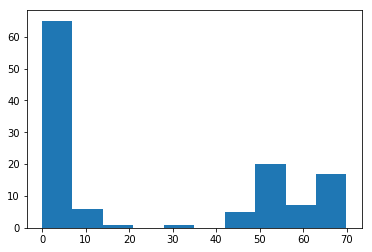

In [18]:
# check missing value of app_train
miss_app_train = check_missing_col(app_train)
missing_hist(miss_app_train)

        missing_num  minssing_percent
133770           61              50.0
244833           61              50.0
150206           61              50.0
69707            61              50.0
269786           61              50.0
         missing_num  minssing_percent
count  307511.000000     307511.000000
mean       29.763049         24.395942
std        20.919345         17.147004
min         0.000000          0.000000
25%         5.000000          4.098361
50%        36.000000         29.508197
75%        49.000000         40.163934
max        61.000000         50.000000


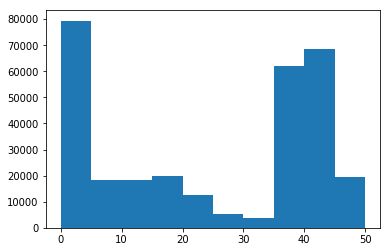

In [19]:
missing_hist(check_missing_row(app_train))

                       missing_num  minssing_percent
CNT_INSTALMENT_FUTURE        26087          0.260835
CNT_INSTALMENT               26071          0.260675
SK_DPD_DEF                       0          0.000000
SK_DPD                           0          0.000000
NAME_CONTRACT_STATUS             0          0.000000
        missing_num  minssing_percent
count      8.000000          8.000000
mean    6519.750000          0.065189
std    12072.231948          0.120706
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.000000
75%     6517.750000          0.065169
max    26087.000000          0.260835


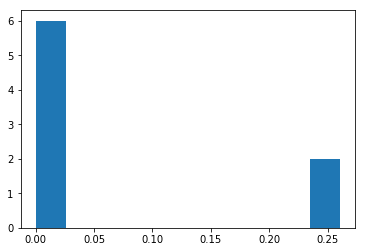

In [83]:
# check missing value of POS_CASH_balance
miss_POS_CASH = check_missing_col(POS_CASH_balance)
missing_hist(miss_POS_CASH)

         missing_num  minssing_percent
8095302            2              25.0
6099819            2              25.0
7188626            2              25.0
7188625            2              25.0
5799073            2              25.0
        missing_num  minssing_percent
count  1.000136e+07      1.000136e+07
mean   5.215092e-03      6.518865e-02
std    1.018921e-01      1.273651e+00
min    0.000000e+00      0.000000e+00
25%    0.000000e+00      0.000000e+00
50%    0.000000e+00      0.000000e+00
75%    0.000000e+00      0.000000e+00
max    2.000000e+00      2.500000e+01


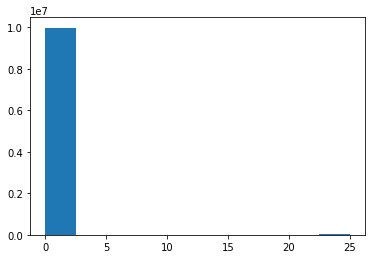

In [20]:
missing_hist(check_missing_row(POS_CASH_balance))

                missing_num  minssing_percent
STATUS                    0               0.0
MONTHS_BALANCE            0               0.0
SK_ID_BUREAU              0               0.0
       missing_num  minssing_percent
count          3.0               3.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


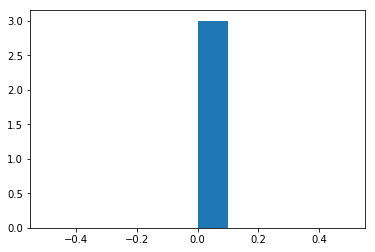

In [21]:
miss_bureau_balance = check_missing_col(bureau_balance)
missing_hist(miss_bureau_balance)

          missing_num  minssing_percent
27299924            0               0.0
9099834             0               0.0
9099966             0               0.0
9099967             0               0.0
9099968             0               0.0
       missing_num  minssing_percent
count   27299925.0        27299925.0
mean           0.0               0.0
std            0.0               0.0
min            0.0               0.0
25%            0.0               0.0
50%            0.0               0.0
75%            0.0               0.0
max            0.0               0.0


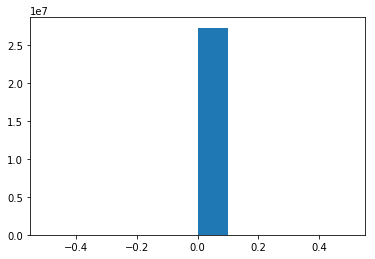

In [85]:
missing_hist(check_missing_row(bureau_balance))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


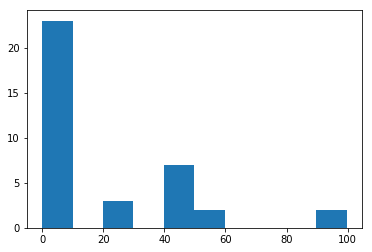

In [68]:
#check_missing(previous_application)
missing_hist(check_missing_col(previous_application))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


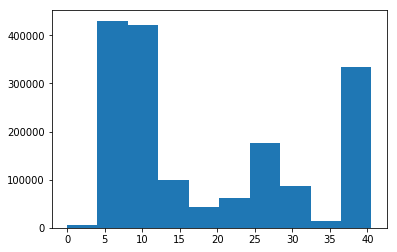

In [86]:
missing_hist(check_missing_row(previous_application))

                          missing_num  minssing_percent
RATE_INTEREST_PRIVILEGED      1664263         99.643698
RATE_INTEREST_PRIMARY         1664263         99.643698
RATE_DOWN_PAYMENT              895844         53.636480
AMT_DOWN_PAYMENT               895844         53.636480
NAME_TYPE_SUITE                820405         49.119754
        missing_num  minssing_percent
count  3.700000e+01         37.000000
mean   3.002523e+05         17.976877
std    4.602509e+05         27.556401
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    6.730650e+05         40.298129
max    1.664263e+06         99.643698


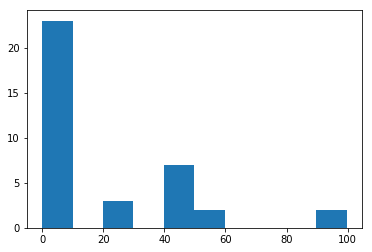

In [69]:
#check_missing(credit_card_balance)
missing_hist(check_missing_col(credit_card_balance))

        missing_num  minssing_percent
402355           15         40.540541
545870           15         40.540541
24543            15         40.540541
205845           15         40.540541
366790           15         40.540541
        missing_num  minssing_percent
count  1.670214e+06      1.670214e+06
mean   6.651445e+00      1.797688e+01
std    4.648636e+00      1.256388e+01
min    0.000000e+00      0.000000e+00
25%    2.000000e+00      5.405405e+00
50%    4.000000e+00      1.081081e+01
75%    1.100000e+01      2.972973e+01
max    1.500000e+01      4.054054e+01


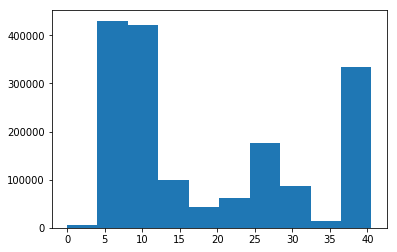

In [87]:
missing_hist(check_missing_row(credit_card_balance))

                        missing_num  minssing_percent
AMT_ANNUITY                 1226791         71.473490
AMT_CREDIT_MAX_OVERDUE      1124488         65.513264
DAYS_ENDDATE_FACT            633653         36.916958
AMT_CREDIT_SUM_LIMIT         591780         34.477415
AMT_CREDIT_SUM_DEBT          257669         15.011932
        missing_num  minssing_percent
count  1.700000e+01         17.000000
mean   2.317616e+05         13.502552
std    4.096962e+05         23.869116
min    0.000000e+00          0.000000
25%    0.000000e+00          0.000000
50%    0.000000e+00          0.000000
75%    2.576690e+05         15.011932
max    1.226791e+06         71.473490


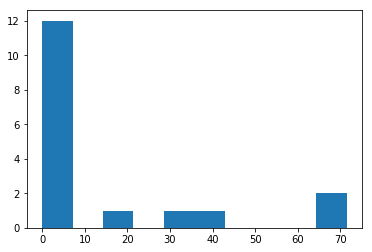

In [70]:
#check_missing(bureau)
missing_hist(check_missing_col(bureau))

        missing_num  minssing_percent
793046            6         35.294118
773821            6         35.294118
871866            6         35.294118
468959            6         35.294118
701505            6         35.294118
        missing_num  minssing_percent
count  1.716428e+06      1.716428e+06
mean   2.295434e+00      1.350255e+01
std    1.126084e+00      6.624026e+00
min    0.000000e+00      0.000000e+00
25%    1.000000e+00      5.882353e+00
50%    2.000000e+00      1.176471e+01
75%    3.000000e+00      1.764706e+01
max    6.000000e+00      3.529412e+01


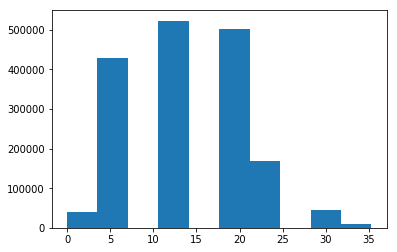

In [88]:
missing_hist(check_missing_row(bureau))

# Select and Re-Encode Features

In [1]:
def select_feature_type(df,data_type):
    return df.select_dtypes(include=[data_type])

In [2]:
def count_feature_type(df):
    return df.dtypes.value_counts()

In [36]:
def count_col_unique(df,data_type):
    '''count the total unique value number of each colunm
    data_type could be object,category'''
    return app_train.select_dtypes(data_type).apply(pd.Series.nunique, axis = 0)

In [37]:
def count_col_each_unique(df,col_name):
    '''count total number of observations of each unique value of a colunm'''
    return df.groupby(col_name)[col_name].count()

In [55]:
def check_distribution(df,col_name):
    print(df[col_name].describe())
    print('Total missing value number: ',df[col_name].isnull().sum())
    plt.figure(figsize=(12,5))
    sns.distplot(df[col_name].dropna())

In [4]:
def label_encoder(df, categorical_columns=None):
    """Encode categorical values as integers (0,1,2,3...) with pandas.factorize. """
    # if categorical_colunms are not given than treat object as categorical features
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        df[col], uniques = pd.factorize(df[col])
    return df, categorical_columns

In [5]:
def one_hot_encoder(df, categorical_columns=None, nan_as_category=True):
    """Create a new column for each categorical value in categorical columns. """
    original_columns = list(df.columns)
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    categorical_columns = [c for c in df.columns if c not in original_columns]
    return df, categorical_columns


## check value type and correct wrong values

In [22]:
count_feature_type(app_train)

float64    65
int64      41
object     16
dtype: int64

In [23]:
count_col_unique(app_train,'object')

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [38]:
count_col_each_unique(app_train,'CODE_GENDER')

CODE_GENDER
0    105059
1    202448
2         4
Name: CODE_GENDER, dtype: int64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
Total missing value number:  0


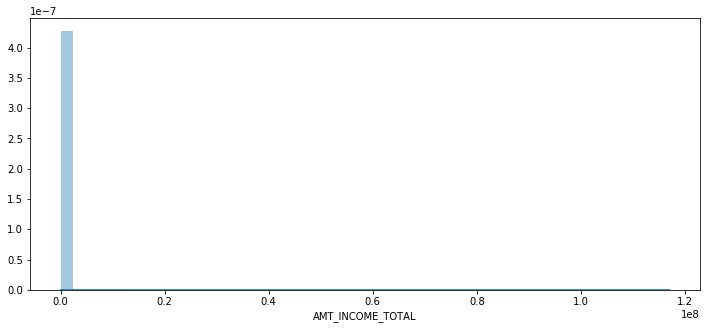

In [58]:
check_distribution(app_train,'AMT_INCOME_TOTAL')

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64
Total missing value number:  55374


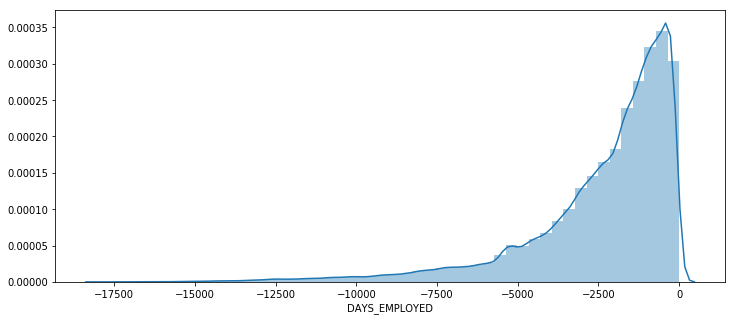

In [56]:
# this discussion https://www.kaggle.com/c/home-credit-default-risk/discussion/57247#332033
# says 365243 means NA
check_distribution(app_train,'DAYS_EMPLOYED')

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
Total missing value number:  1


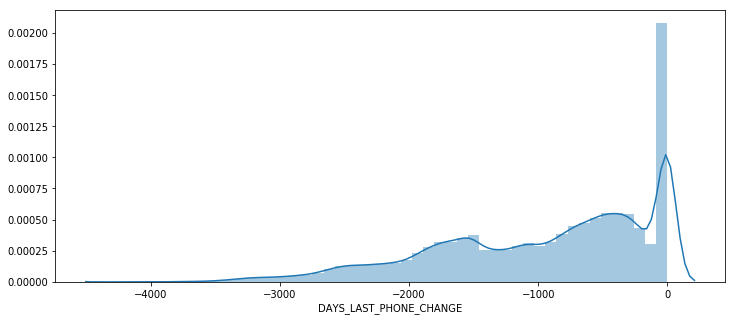

In [57]:
# total number of 1 missing value and add spike on value 0
# 0 could mean nan value
check_distribution(app_train,'DAYS_LAST_PHONE_CHANGE')

In [ ]:
# remove 4 people code_gender value 'XNA'
app_train = app_train[app_train['CODE_GENDER'] != 'XNA']  # 4 people with XNA code gender

In [44]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

In [59]:
app_train['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

In [25]:
# change all categorical feature to numerical 
app_train_clean, categorical_columns = label_encoder(app_train, categorical_columns=None)

In [26]:
app_train_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Baseline Model

In [65]:
def cross_validate(train):
    """Compute cross validation ROC AUC of a gradient boosting model for a given training dataset"""
    
    # Extract the labels
    train_labels = np.array(train['TARGET'].astype(np.int32)).reshape((-1, ))
    train = train.drop(columns = ['TARGET', 'SK_ID_CURR'])

    # Create a  lgb training set
    train_set = lgb.Dataset(train, label = train_labels)

    # Find default hyperparameters
    model = lgb.LGBMClassifier()
    params = model.get_params()

    # Number of estimators will be selected through early stopping
    del params['n_estimators'], params['silent']

    # Early stoppping with 5 fold cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, metrics = 'auc', 
                        early_stopping_rounds = 100, seed = RSEED, nfold = 5)

    print('Cross Validation ROC AUC: {:.5f} with std: {:.5f}.'.format(cv_results['auc-mean'][-1],
                                                                               cv_results['auc-stdv'][-1]))

    print('Number of estimators trained: {}'.format(len(cv_results['auc-mean'])))
    
    return cv_results

In [66]:
cv_results_baseline = cross_validate(app_train)

Cross Validation ROC AUC: 0.75531 with std: 0.00580.
Number of estimators trained: 132
